<a href="https://www.kaggle.com/code/amanmukati/geolifeclef-2024-lifeclef-cvpr-fgvc?scriptVersionId=175961428" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# **https://lab.plantnet.org/seafile/d/bdb829337aa44a9489f6/**

# Paths

# Enviromental Rasters

### Enviromental Rasters - Climate - Average 1981-2010

https://chelsa-climate.org/wp-admin/download-page/CHELSA_tech_specification_V2.pdf


**shortname

longname

unit

scale

offset

explanation

bio1

mean annual air temperature

°C

0.1

-273.15

mean annual daily mean air temperatures averaged over 1 year

bio2

mean diurnal air temperature range

°C

0.1

0

mean diurnal range of temperatures averaged over 1 year

bio3

isothermality

°C

0.1

0

ratio of diurnal variation to annual variation in temperatures

bio4

temperature seasonality

°C/100

0.1

0

standard deviation of the monthly mean temperatures

bio5

mean daily maximum air temperature of the warmest month

°C

0.1

-273.15

The highest temperature of any monthly daily mean maximum temperature

bio6

mean daily minimum air temperature of the coldest month

°C

0.1

-273.15

The lowest temperature of any monthly daily mean maximum temperature

bio7

annual range of air temperature

°C

0.1

0

The difference between the Maximum Temperature of Warmest month and the Minimum Temperature of Coldest month

bio8

mean daily mean air temperatures of the wettest quarter

°C

0.1

-273.15

The wettest quarter of the year is determined (to the nearest month)

bio9

mean daily mean air temperatures of the driest quarter

°C

0.1

-273.15

The driest quarter of the year is determined (to the nearest month)

bio10

mean daily mean air temperatures of the warmest quarter

°C

0.1

-273.15

The warmest quarter of the year is determined (to the nearest month)

bio11

mean daily mean air temperatures of the coldest quarter

°C

0.1

-273.15

The coldest quarter of the year is determined (to the nearest month)

bio12

annual precipitation amount

kg m-2

0.1

0

Accumulated precipitation amount over 1 year

bio13

precipitation amount of the wettest month

kg m-2

0.1

0

The precipitation of the wettest month.

bio14

precipitation amount of the driest month

kg m-2

0.1

0

The precipitation of the driest month.

bio15

precipitation seasonality

kg m-2

0.1

0

The Coefficient of Variation is the standard deviation of the monthly precipitation estimates expressed as a percentage of the mean of those estimates (i.e. the annual mean)

bio16

mean monthly precipitation amount of the wettest quarter

kg m-2

0.1

0

The wettest quarter of the year is determined (to the nearest month)

bio17

mean monthly precipitation amount of the driest quarter

kg m-2

0.1

0

The driest quarter of the year is determined (to the nearest month)

bio18

mean monthly precipitation amount of the warmest quarter

kg m-2

0.1

0

The warmest quarter of the year is determined (to the nearest month)

bio19

mean monthly precipitation amount of the coldest quarter

kg m-2

0.1

0

The coldest quarter of the year is determined (to the nearest month)**

In [2]:
glc24_pa_bioclim_avg_test="/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Climate/Average 1981-2010/GLC24-PA-test-bioclimatic.csv"
glc24_pa_bioclim_avg_train="/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Climate/Average 1981-2010/GLC24-PA-train-bioclimatic.csv"

##### Train

In [3]:
glc24_pa_bioclim_avg_train_df = pd.read_csv(glc24_pa_bioclim_avg_train)

In [4]:
glc24_pa_bioclim_avg_train_df

,surveyId,Bio1,Bio2,Bio3,Bio4,Bio5,Bio6,Bio7,Bio8,Bio9,Bio10,Bio11,Bio12,Bio13,Bio14,Bio15,Bio16,Bio17,Bio18,Bio19
0,212,2883,68,3,5545,3007,2780,227,2854,2958,2958,2816,6355,933,143,395,2282,770,770,1917
1,222,2815,59,2,5690,2935,2720,215,2860,2768,2890,2746,7286,792,376,201,2283,1336,2076,1653
2,243,2821,26,1,5150,2910,2741,169,2838,2832,2888,2759,8546,1117,372,295,2986,1438,2448,1838
3,324,2870,90,3,5315,2992,2756,236,2810,2938,2938,2802,10719,1163,564,197,3216,1948,1948,2926
4,333,2858,81,3,5285,2982,2758,224,2827,2927,2927,2792,9353,1095,503,249,3186,1638,1638,2677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88982,3919553,2817,30,1,5398,2913,2734,179,2864,2767,2887,2752,8000,919,408,218,2505,1425,2187,1723
88983,3919592,2812,19,1,5540,2909,2734,175,2833,2781,2888,2748,6932,781,314,240,2242,1214,2029,1498
88984,3919620,2815,59,2,5564,2931,2722,209,2860,2803,2887,2746,9745,1201,440,246,3167,1718,2489,2413
88985,3919640,2808,66,2,6775,2945,2693,252,2895,2759,2895,2722,7301,816,390,211,2357,1336,2357,1558


Example:

Lets take surveyid :212
bio-1:2883

so we will calculate it like 2883*0.1 + offset(-273.15) Which is nearly === 15 deg celcius

Similarly you can understand other things....

##### Test

In [5]:
glc24_pa_bioclim_avg_test_df = pd.read_csv(glc24_pa_bioclim_avg_test)

## Enviromental Rasters - Climate - Monthly

In [6]:
glc24_pa_bioclim_monthly_test = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Climate/Monthly/GLC24-PA-test-bioclimatic_monthly.csv"
glc24_pa_bioclim_monthly_train = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Climate/Monthly/GLC24-PA-train-bioclimatic_monthly.csv"

##### Train

### Year 2000 - 2018 total 19 years data for europe flora, pr-precipitation, 01-month from jan - dec and 2000 is year here. tas is tempreature monthly. min, max, mean.

In [7]:
glc24_pa_bioclim_monthly_train_df = pd.read_csv(glc24_pa_bioclim_monthly_train)
glc24_pa_bioclim_monthly_train_df

,surveyId,Bio-pr_01_2000,Bio-tas_01_2000,Bio-tasmax_01_2000,Bio-tasmin_01_2000,Bio-pr_02_2000,Bio-tas_02_2000,Bio-tasmax_02_2000,Bio-tasmin_02_2000,Bio-pr_03_2000,...,Bio-tasmax_10_2018,Bio-tasmin_10_2018,Bio-pr_11_2018,Bio-tas_11_2018,Bio-tasmax_11_2018,Bio-tasmin_11_2018,Bio-pr_12_2018,Bio-tas_12_2018,Bio-tasmax_12_2018,Bio-tasmin_12_2018
0,212,5872,2801,2828,2773,1229,2834,2860,2796,1184,...,2925,2872,7830,2862,2884,2836,4271,2839,2865,2810
1,222,4998,2765,2783,2740,6591,2769,2790,2745,6000,...,2861,2810,3787,2791,2809,2777,6133,2773,2786,2756
2,243,5387,2776,2787,2765,8123,2776,2785,2765,5518,...,2861,2837,4348,2805,2815,2795,9243,2787,2795,2776
3,324,1567,2777,2817,2739,9315,2830,2868,2780,10298,...,2927,2837,8789,2833,2879,2797,5142,2826,2861,2795
4,333,2085,2780,2810,2752,10213,2813,2845,2774,3199,...,2924,2839,9468,2824,2861,2799,13480,2818,2846,2794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88982,3919553,6611,2769,2781,2755,7288,2770,2781,2757,5004,...,2853,2824,4806,2800,2808,2792,7069,2778,2787,2767
88983,3919592,4285,2758,2768,2748,5262,2766,2774,2757,5956,...,2858,2838,2371,2805,2813,2796,8645,2777,2787,2768
88984,3919620,7659,2766,2784,2747,9838,2770,2790,2751,7895,...,2867,2815,4292,2792,2812,2776,9625,2778,2791,2762
88985,3919640,6395,2729,2748,2708,7549,2756,2779,2731,8891,...,2872,2799,867,2774,2800,2757,7938,2751,2764,2733


##### Test

# Enviromental Rasters - Elevation

## - Data download point: https://search.earthdata.nasa.gov
Bounding box used to restrain the data query: min_x, min_y, max_x, max_y = -32.26344, 26.63842, 35.58677, 72.18392

- DEM .tif files were merged and converted to a compressed Cloud Optimized Geotiff thanks to GDAL tools.
- Projection: EPSG:4326 (WGS84)
- Data type: Int16.

In [8]:
glc24_pa_elevation_test = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Elevation/GLC24-PA-test-elevation.csv"
glc24_pa_elevation_train = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Elevation/GLC24-PA-train-elevation.csv"

##### Train

https://lpdaac.usgs.gov/products/astgtmv003/

In [9]:
glc24_pa_elevation_train_df = pd.read_csv(glc24_pa_elevation_train)
glc24_pa_elevation_train_df

,surveyId,Elevation
0,212,47.0
1,222,6.0
2,243,10.0
3,324,116.0
4,333,84.0
...,...,...
88982,3919553,23.0
88983,3919592,138.0
88984,3919620,37.0
88985,3919640,131.0


##### Test

# Enviromental Rasters - Human Footprint

**Name                    | Description                                                                   | Folder     
---------------------------------------------------------------------------------------------------------------------
HFP1993_WGS84.tif       | The Human Footprint camp of cumulative pressures on the environment in 1993.  | summarized 


HFP2009_WGS84.tif       | The Human Footprint camp of cumulative pressures on the environment in 2009.  | summarized



Built1994_WGS84.tif     | Individual pressure map of built environments in 1994.                        | detailed


Built2009_WGS84.tif     | Individual pressure map of built environments in 2009.                        | detailed



Croplands1992_WGS84.tif | Individual pressure map of crop lands in 1992.                                | detailed



Croplands2005_WGS84.tif | Individual pressure map of crop lands in 2005.                                | detailed



Lights1994_WGS84.tif    | Individual pressure map of night-time lights in 1994.                         | detailed



Lights2009_WGS84.tif    | Individual pressure map of night-time lights in 2009.                         | detailed



Navwater1994_WGS84.tif  | Individual pressure map of navigable waterways in 1994.                       | detailed



Navwater2009_WGS84.tif  | Individual pressure map of navigable waterways in 2009.                       | detailed


Pasture1993_WGS84.tif   | Individual pressure map of pasture lands in 1993.                             | detailed



Pasture2009_WGS84.tif   | Individual pressure map of pasture lands in 2009.                             | detailed



Popdensity1990_WGS84.tif| Individual pressure map of human population density in 1990.                  | detailed



Popdensity2010_WGS84.tif| Individual pressure map of human population density in 2010.                  | detailed



Railways_WGS84.tif      | Individual pressure map of railways circa 1990.                               | detailed



Roads_WGS84.tif         | Individual pressure map of roads circa 2000.                                  | detailed**

In [10]:
glc24_pa_humanfootprint_test = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Human Footprint/GLC24-PA-test-human_footprint.csv"
glc24_pa_humanfootprint_train = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/Human Footprint/GLC24-PA-train-human_footprint.csv"

##### Train


In [11]:
glc24_pa_humanfootprint_train_df = pd.read_csv(glc24_pa_humanfootprint_train)
glc24_pa_humanfootprint_train_df

,surveyId,HumanFootprint-Built1994,HumanFootprint-Built2009,HumanFootprint-croplands1992,HumanFootprint-croplands2005,HumanFootprint-Lights1994,HumanFootprint-Lights2009,HumanFootprint-NavWater1994,HumanFootprint-NavWater2009,HumanFootprint-Pasture1993,HumanFootprint-Pasture2009,HumanFootprint-Popdensity1990,HumanFootprint-Popdensity2010,HumanFootprint-Railways,HumanFootprint-Roads,HumanFootprint-HFP1993,HumanFootprint-HFP2009
0,212,0.0,0.0,7.0,7.00,6.0,6.0,0.0,0.0,0.0,0.0,6.0,7.0,0.0,0.0,20.0,21.0
1,222,0.0,0.0,3.5,7.00,1.0,1.0,0.0,0.0,0.0,0.0,7.0,7.0,4.0,2.0,10.0,17.0
2,243,0.0,0.0,7.0,0.00,4.0,2.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,15.0,6.0
3,324,0.0,0.0,0.0,7.00,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,9.0,15.0
4,333,0.0,0.0,7.0,7.00,1.0,4.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88982,3919553,0.0,0.0,7.0,7.00,1.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,14.0,13.0
88983,3919592,0.0,0.0,7.0,1.75,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,13.0,6.0
88984,3919620,0.0,0.0,7.0,0.00,2.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,14.0,6.0
88985,3919640,0.0,0.0,7.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,11.0,4.0


##### Test

#### Enviromental Rasters - LandCover

Band    | SDS Full Name                       | Short Name    | Description                       | Units | Valid Range
--------------------------------------------------------------------------------------------------------------

1       | Land Cover Type 1                   | LC_Type1      | Annual IGBP classification        | Class | [1,17]


2       | Land Cover Type 2                   | LC_Type2      | Annual UMD classification         | Class | [0,15]


3       | Land Cover Type 3                   | LC_Type3      | Annual LAI classification         | Class | [0,10]


4       | Land Cover Type 4                   | LC_Type4      | Annual BGC classification         | Class | [0,8]


5       | Land Cover Type 5                   | LC_Type5      | Annual PFT classification         | Class | [0,11]


6       | Land Cover Property 1 Assessment    | LC_Prop1_Ass  | LCCS1 land cover layer confidence | % x100| [0,100]


7       | Land Cover Property 2 Assessment    | LC_Prop2_Ass  | LCCS2 land use layer confidence   | % x100| [0,100]


8       | Land Cover Property 3 Assessment    | LC_Prop3_Ass  | LCCS3 surface hydro. layer confid.| % x100| [0,100]


9       | Land Cover Property 1               | LC_Prop1      | LCCS1 land cover layer            | Class | [1,43]


10      | Land Cover Property 2               | LC_Prop2      | LCCS2 land use layer              | Class | [1,40]


11      | Land Cover Property 3               | LC_Prop3      | LCCS3 surface hydrology layer     | Class | [1,51]


12      | Land Cover QC                       | QC            | Product quality flags             | Flags | [0,10]


13      | Land Water Mask                     | LW            | Binary land (class 2) / water     | Class | [0,2]
                                                                (class 1) mask derived from MOD44W

In [12]:
glc24_pa_landcover_test = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/LandCover/GLC24-PA-test-landcover.csv"
glc24_pa_landcover_train = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/LandCover/GLC24-PA-train-landcover.csv"

##### Train

In [13]:
glc24_pa_landcover_train_df = pd.read_csv(glc24_pa_landcover_train)
glc24_pa_landcover_train_df.head()

,surveyId,LandCover
0,212,8.0
1,222,12.0
2,243,5.0
3,324,14.0
4,333,14.0


##### Test

#### Envirmental Rasters - Soil Grids

### Variables description:
### crop_proj_bdod_5-15cm_mean_1000.tif": Bulk density (cg/cm3)
### "crop_proj_cec_5-15cm_mean_1000.tif": Cation exchange capacity at ph 7 (mmol(c)/kg)
### "crop_proj_cfvo_5-15cm_mean_1000.tif": Coarse fragments in cm3/dm3
### "crop_proj_clay_5-15cm_mean_1000.tif": Clay content in g/kg
### "crop_proj_nitrogen_5-15cm_mean_1000.tif": Nitrogen in cg/kg
### "crop_proj_phh2o_5-15cm_mean_1000.tif": pH water (pH *10)
### "crop_proj_sand_5-15cm_mean_1000.tif": Sand in g/kg
### "crop_proj_silt_5-15cm_mean_1000.tif": Silt in g/kg
### "crop_proj_soc_5-15cm_mean_1000.tif": Soil organic carbon (dg/kg)

In [14]:
glc24_pa_soilgrids_test = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/SoilGrids/GLC24-PA-test-soilgrids.csv"
glc24_pa_soilgrids_train = "/kaggle/input/geolifeclef-2024/EnvironmentalRasters/EnvironmentalRasters/SoilGrids/GLC24-PA-train-soilgrids.csv"

##### Train

In [15]:
glc24_pa_soilgrids_train_df = pd.read_csv(glc24_pa_soilgrids_train)
glc24_pa_soilgrids_train_df

,surveyId,Soilgrid-bdod,Soilgrid-cec,Soilgrid-cfvo,Soilgrid-clay,Soilgrid-nitrogen,Soilgrid-phh2o,Soilgrid-sand,Soilgrid-silt,Soilgrid-soc
0,212,140.0,214.0,151.0,292.0,159.0,73.0,284.0,422.0,176.0
1,222,120.0,225.0,101.0,94.0,379.0,58.0,650.0,255.0,609.0
2,243,115.0,261.0,86.0,131.0,373.0,54.0,750.0,117.0,672.0
3,324,118.0,179.0,117.0,225.0,230.0,57.0,238.0,535.0,302.0
4,333,138.0,233.0,176.0,328.0,250.0,71.0,231.0,439.0,257.0
...,...,...,...,...,...,...,...,...,...,...
88982,3919553,116.0,199.0,65.0,116.0,311.0,59.0,622.0,260.0,485.0
88983,3919592,118.0,245.0,113.0,156.0,405.0,54.0,555.0,288.0,868.0
88984,3919620,113.0,233.0,70.0,71.0,253.0,56.0,798.0,129.0,414.0
88985,3919640,130.0,162.0,99.0,55.0,234.0,50.0,803.0,141.0,502.0


##### Test

# LandSat TimeSeries

Since the original rasters require a high amount of disk space, we extracted the data points from each spectral band corresponding to all PA and PO locations (i.e., GPS coordinates) and aggregated them in CSV files. Each data point corresponds to the mean value of Landsat's observations at the given location for three months before the given time; e.g., the value of a time series element under column 2012_4 will represent the mean value for that element from October 2012 to December 2012.

Each CSV file contains the following columns:
surveyId: Unique surveyId identifier.
<year>_<quarter>: Temporal window of study containing values in the range [0-255].

In [16]:
glc24_pa_ls_ts_test_blue  = "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-blue.csv"
glc24_pa_ls_ts_test_green = "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-green.csv"
glc24_pa_ls_ts_test_nir= "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-nir.csv"
glc24_pa_ls_ts_test_red = "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-red.csv"
glc24_pa_ls_ts_test_swir1 = "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-swir1.csv"
glc24_pa_ls_ts_test_swir2 = "/kaggle/input/geolifeclef-2024/PA-test-landsat_time_series/GLC24-PA-test-landsat_time_series-swir2.csv"

### Train

In [17]:
glc24_pa_ls_ts_train_blue  = "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-blue.csv"
glc24_pa_ls_ts_train_green = "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-green.csv"
glc24_pa_ls_ts_train_nir= "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-nir.csv"
glc24_pa_ls_ts_train_red = "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-red.csv"
glc24_pa_ls_ts_train_swir1 = "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-swir1.csv"
glc24_pa_ls_ts_train_swir2 = "/kaggle/input/geolifeclef-2024/PA-train-landsat_time_series/GLC24-PA-train-landsat_time_series-swir2.csv"

#### Blue

In [18]:
glc24_pa_ls_ts_train_blue_df = pd.read_csv(glc24_pa_ls_ts_train_blue)
glc24_pa_ls_ts_train_blue_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,6.0,6.0,4.0,5.0,6.0,5.0,4.0,5.0,6.0,...,7.0,6.0,7.0,6.0,8.0,6.0,7.0,6.0,6.0,6.0
1,222,6.0,5.0,6.0,7.0,6.0,7.0,6.0,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,6.0,5.0,6.0,9.0,5.0,4.0,5.0,6.0,6.0,...,5.0,4.0,8.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN
3,324,12.0,16.0,6.0,5.0,11.0,19.0,6.0,8.0,11.0,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,10.0,7.0,12.0,7.0,11.0,23.0,27.0,12.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Green

In [19]:
glc24_pa_ls_ts_train_green_df = pd.read_csv(glc24_pa_ls_ts_train_green)
glc24_pa_ls_ts_train_green_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,11.0,10.0,10.0,10.0,13.0,9.0,10.0,11.0,11.0,...,14.0,12.0,12.0,11.0,14.0,13.0,12.0,11.0,12.0,12.0
1,222,15.0,15.0,17.0,17.0,15.0,16.0,20.0,18.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,10.0,9.0,13.0,12.0,10.0,9.0,10.0,10.0,10.0,...,9.0,8.0,14.0,9.0,10.0,10.0,NaN,NaN,NaN,NaN
3,324,24.0,32.0,13.0,14.0,22.0,35.0,14.0,17.0,22.0,...,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,23.0,17.0,23.0,17.0,22.0,43.0,49.0,25.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### NIR

In [20]:
glc24_pa_ls_ts_train_nir_df = pd.read_csv(glc24_pa_ls_ts_train_nir)
glc24_pa_ls_ts_train_nir_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,30.0,30.0,30.0,31.0,30.0,30.0,30.0,34.0,30.0,...,39.0,37.0,29.0,37.0,37.0,34.0,22.0,34.0,35.0,35.0
1,222,98.0,103.0,117.0,107.0,98.0,116.0,108.0,111.0,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,20.0,20.0,31.0,22.0,20.0,19.0,19.0,20.0,20.0,...,24.0,16.0,32.0,13.0,12.0,27.0,NaN,NaN,NaN,NaN
3,324,77.0,60.0,93.0,80.0,78.0,66.0,88.0,72.0,71.0,...,78.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,81.0,78.0,68.0,95.0,81.0,90.0,94.0,77.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### RED

In [21]:
glc24_pa_ls_ts_train_red_df = pd.read_csv(glc24_pa_ls_ts_train_red)
glc24_pa_ls_ts_train_red_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,9.0,9.0,7.0,9.0,11.0,8.0,7.0,9.0,9.0,...,11.0,9.0,9.0,10.0,12.0,10.0,9.0,10.0,10.0,9.0
1,222,11.0,12.0,10.0,14.0,11.0,14.0,16.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,10.0,10.0,14.0,10.0,10.0,9.0,9.0,10.0,10.0,...,6.0,7.0,10.0,6.0,9.0,8.0,NaN,NaN,NaN,NaN
3,324,27.0,39.0,10.0,13.0,25.0,44.0,11.0,17.0,25.0,...,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,24.0,15.0,28.0,15.0,24.0,52.0,58.0,25.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SWIR-1

In [22]:
glc24_pa_ls_ts_train_swir1_df = pd.read_csv(glc24_pa_ls_ts_train_swir1)
glc24_pa_ls_ts_train_swir1_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,16.0,30.0,26.0,20.0,20.0,27.0,26.0,20.0,18.0,...,29.0,24.0,22.0,32.0,31.0,25.0,17.0,35.0,29.0,23.0
1,222,43.0,51.0,53.0,67.0,43.0,52.0,58.0,64.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,17.0,21.0,22.0,21.0,17.0,11.0,17.0,18.0,16.0,...,14.0,17.0,10.0,6.0,15.0,18.0,NaN,NaN,NaN,NaN
3,324,66.0,66.0,44.0,45.0,60.0,81.0,45.0,53.0,60.0,...,43.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,60.0,57.0,75.0,53.0,60.0,108.0,108.0,62.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SWIR-2

In [23]:
glc24_pa_ls_ts_train_swir2_df = pd.read_csv(glc24_pa_ls_ts_train_swir2)
glc24_pa_ls_ts_train_swir2_df.head()

,surveyId,2000_1,2000_2,2000_3,2000_4,2001_1,2001_2,2001_3,2001_4,2002_1,...,2018_3,2018_4,2019_1,2019_2,2019_3,2019_4,2020_1,2020_2,2020_3,2020_4
0,212,8.0,16.0,12.0,12.0,12.0,14.0,12.0,13.0,10.0,...,17.0,13.0,9.0,17.0,16.0,13.0,11.0,21.0,15.0,13.0
1,222,21.0,22.0,21.0,34.0,21.0,23.0,27.0,28.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,243,12.0,10.0,13.0,14.0,12.0,5.0,13.0,13.0,12.0,...,7.0,11.0,9.0,1.0,8.0,12.0,NaN,NaN,NaN,NaN
3,324,36.0,39.0,18.0,21.0,32.0,61.0,20.0,26.0,32.0,...,18.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,333,34.0,26.0,45.0,25.0,36.0,87.0,85.0,44.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PA Satellite NIR - Folder

In [24]:
pa_test_patches_nir = "/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_NIR/pa_test_patches_nir"
pa_train_patches_nir = "/kaggle/input/geolifeclef-2024/PA_Train_SatellitePatches_NIR/pa_train_patches_nir"

In [25]:
pa_train_patches_nir_dirs = os.listdir(pa_train_patches_nir)

In [26]:
tpnirsam = pa_train_patches_nir+"/"+pa_train_patches_nir_dirs[0]+'/00'

### "/CD/AB/XXXXABCD.jpeg'. For example, the image location for the surveyId 3018575 is "./75/85/3018575.jpeg"  ----> This is how we will check images. 

820047.jpeg


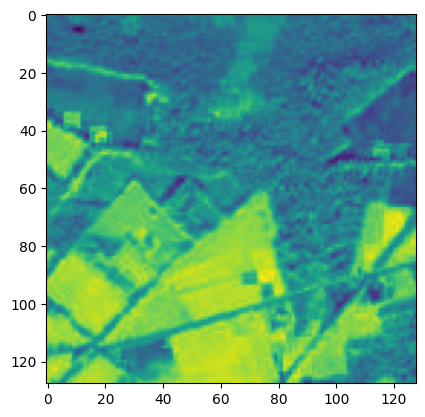

130047.jpeg


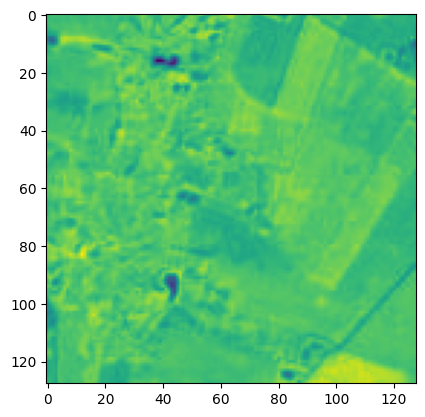

1620047.jpeg


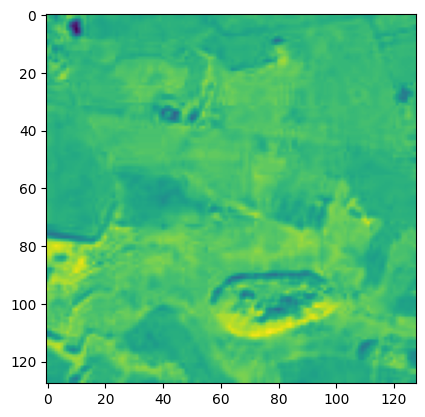

1280047.jpeg


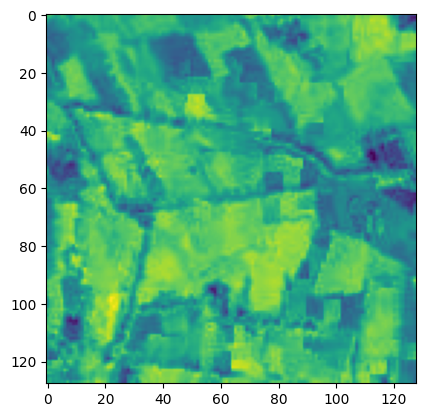

3680047.jpeg


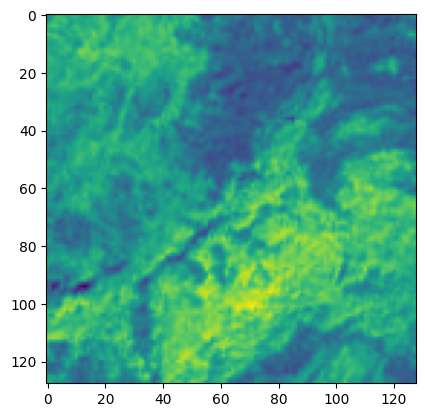

3830047.jpeg


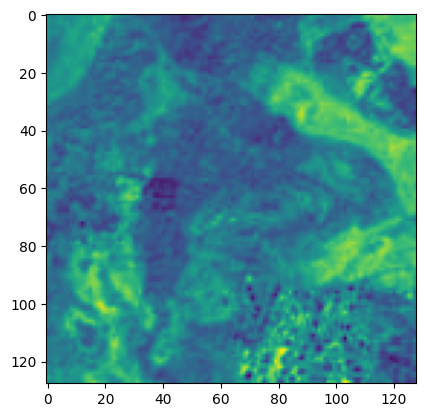

650047.jpeg


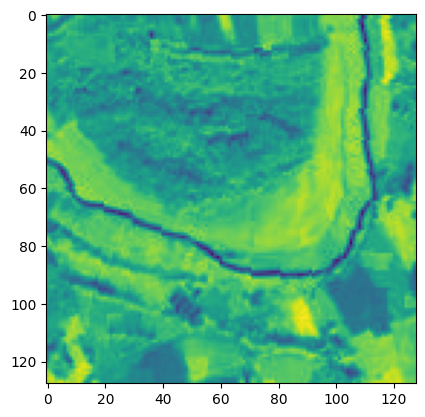

2140047.jpeg


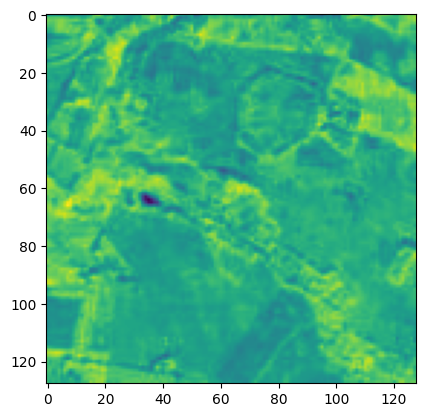

In [27]:
for img_1 in os.listdir(tpnirsam):
    print(img_1)
    img = mpimg.imread(tpnirsam+'/'+img_1)
    plt.imshow(img)
    plt.show()
    

## PA Satellite RGB - Folder

In [28]:
pa_test_patches_rgb = "/kaggle/input/geolifeclef-2024/PA_Test_SatellitePatches_RGB/pa_test_patches_rgb"
pa_train_patches_rgb = "/kaggle/input/geolifeclef-2024/PA_Train_SatellitePatches_RGB/pa_train_patches_rgb"

In [29]:
pa_train_patches_rgb_dirs = os.listdir(pa_train_patches_rgb)


In [30]:
patprgs = pa_train_patches_rgb + '/' + pa_train_patches_rgb_dirs[0]+'/00'

In [31]:
patprgs

'/kaggle/input/geolifeclef-2024/PA_Train_SatellitePatches_RGB/pa_train_patches_rgb/47/00'

In [32]:
os.listdir(patprgs)

['820047.jpeg',
 '130047.jpeg',
 '1620047.jpeg',
 '1280047.jpeg',
 '3680047.jpeg',
 '3830047.jpeg',
 '650047.jpeg',
 '2140047.jpeg']

820047.jpeg


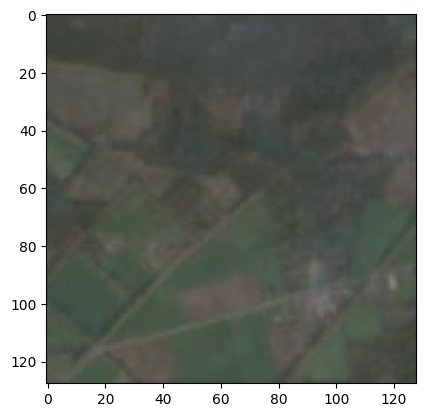

130047.jpeg


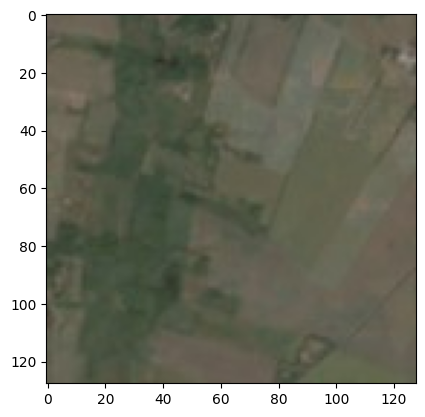

1620047.jpeg


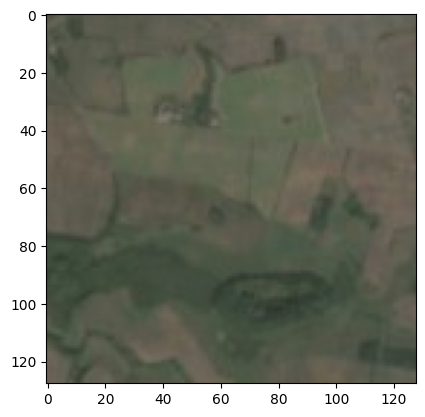

In [33]:
for img_1 in os.listdir(patprgs)[:3]:
    print(img_1)
    img = mpimg.imread(patprgs+'/'+img_1)
    plt.imshow(img)
    plt.show()
    

## Time Series Cubes - Foloders

Description
These archives contain observation extractions in a cube format, saved as a PyTorch tensor object (.pt).

Data & usability
Once extracted, these datacubes can simply be loaded as tensors using PyTorch with the following command :

import torch

torch.﻿load﻿(﻿'path_to_file.pt'﻿)


Python
Here are detailed informations about the datacubes.

Bioclimatic monthly
Shape: (n_year, n_month, n_bio) where:

n_year = 19 (ranging from 2000 to 2018)

n_month = 12 (ranging from January 01 to December 12)

n_bio = 4 comprising [`pr` (precipitation), `tas` (mean daily air temperature), `tasmin`, `tasmax`]

Description
These archives contain observation extractions in a cube format, saved as a PyTorch tensor object (.pt).

Data & usability
Once extracted, these datacubes can simply be loaded as tensors using PyTorch with the following command :

import torch

torch.﻿load﻿(﻿'path_to_file.pt'﻿)


Python
Here are detailed informations about the datacubes.

Landsat time series
Shape: (n_bands, n_quarters, n_years) where:

n_bands = 6 comprising [`red`, `green`, `blue`, `nir`, `swir1`, `swir2`]

n_quarters = 4 where quarters are defined as follows:

Quarter 1: December 2 of previous year until March 20 of current year (winter season proxy),

Quarter 2: March 21 until June 24 of current year (spring season proxy),

Quarter 3: June 25 until September 12 of current year (summer season proxy),

Quarter 4: September 13 until December 1 of current year (fall season proxy).

n_years = 21 (ranging from 2000 to 2020)

In [34]:
tsc_glc24_bioclim_monthly_test = "/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-test-bioclimatic_monthly"
tsc_glc24_bioclim_monthly_train = "/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly"

In [35]:
tsc_glc24_bioclim_monthly_train_dir = os.listdir(tsc_glc24_bioclim_monthly_train)

In [36]:
for ptf_1 in tsc_glc24_bioclim_monthly_train_dir[:10]:
    ptf_1 = tsc_glc24_bioclim_monthly_train + "/" + ptf_1
    print(ptf_1)

/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_2440234_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_801874_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_2867978_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_1828404_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_700895_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_monthly/GLC24-PA-train-bioclimatic_monthly_3498480_cube.pt
/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-bioclimatic_mont

In [37]:
tsc_glc24_landsat_monthly_train = "/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-train-landsat_time_series"
tsc_glc24_landsat_monthly_test = "/kaggle/input/geolifeclef-2024/TimeSeries-Cubes/TimeSeries-Cubes/GLC24-PA-test-landsat_time_series"

### Meta Data

This species presence-absence (PA) data combines around 90 thousand surveys with roughly 10,000 species of European flora. The PA data is provided to compensate for the problem of false-absences of PO data and calibrate models to avoid associated biases. The data is composed of various datasets, including the Inventaire Forestier National in France and other datasets from 30 datasets available on the European Vegetation Archive (EVA).

Each survey represents an inventory of all plant species found in a small plot (between 10m² and 400m²) at a specific date between 2017 and 2021 by professionals and botanists. This data was selected to cover a wide range of habitats across Europe.

The metadata file contains the following columns:

speciesId: Anonymized Species ID as an integer. 

surveyId: An occurrence id.

geoUncertaintyInM: Radius of the uncertainty of the occurrence geolocation in meters.

areaInM2: Size of a plot.

country: Country of origin.

region:  One of the major biogeographical zones, e.g., Atlantic, Continental, Alpine, 

Mediterranean, and Boreal.

year: Year of observation.

taxonRank: Occurance taxonomic rank level. It might be a species or subspecies.

lat: Latitude coordinates wgs.

lon: Longitude coordinates.

This species presence-only metadata (GLC24_PO_metadata_train.csv) combines around five million observations from numerous datasets gathered from the Global Biodiversity Information Facility (GBIF, www.gbif.org).

This data represents the larger piece of the training data and covers all countries of our study area, but it has been sampled opportunistically (without standardized sampling protocol), leading to various sampling biases. The provided metadata file contains the following columns:

speciesId: Anonymized Species ID as an integer. 

surveyId: An occurrence id.

geoUncertaintyInM: Radius of the uncertainty of the occurrence geolocation in meters.

date: String, day of the survey in format yyyy-mm-dd. To allow easier processing, we add additional columns with pre-parsed "year," "month," "day," and "day of year."

taxonRank: Occurance taxonomic rank level. It might be a species or subspecies.

lat: Latitude coordinates.

lon: Longitude coordinates.

publisher: Entity/institution where from the data originates.





In [38]:
glc_meta_po_train = "/kaggle/input/geolifeclef-2024/GLC24_P0_metadata_train.csv"
glc_meta_pa_train = "/kaggle/input/geolifeclef-2024/GLC24_PA_metadata_train.csv"
glc_meta_pa_test = "/kaggle/input/geolifeclef-2024/GLC24_PA_metadata_test.csv"


In [39]:
glc_meta_po_train_df = pd.read_csv(glc_meta_po_train)
glc_meta_po_train_df

,publisher,year,month,day,lat,lon,geoUncertaintyInM,taxonRank,date,dayOfYear,speciesId,surveyId
0,Pl@ntNet,2019,5.0,5.0,43.74605,1.573057,6.00,SPECIES,2019-05-05,125,3383.0,1
1,Pl@ntNet,2021,3.0,17.0,42.12559,0.314948,5.00,SPECIES,2021-03-17,76,1152.0,2
2,Pl@ntNet,2021,6.0,5.0,48.29520,-0.934518,24.90,SPECIES,2021-06-05,156,6772.0,3
3,iNaturalist.org,2021,6.0,9.0,53.63367,-2.644535,8.00,SPECIES,2021-06-09,160,3318.0,4
4,iNaturalist.org,2021,4.0,1.0,49.79471,7.925086,15.00,SPECIES,2021-04-01,91,3374.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5079792,Pl@ntNet,2021,6.0,3.0,52.09212,5.083568,11.50,SPECIES,2021-06-03,154,5300.0,3919658
5079793,The Norwegian Biodiversity Information Centre ...,2020,9.0,12.0,59.24371,11.451360,10.00,SPECIES,2020-09-12,256,1466.0,3919659
5079794,Pl@ntNet,2021,8.0,1.0,44.27572,4.100798,19.00,SPECIES,2021-08-01,213,1813.0,3919660
5079795,Pl@ntNet,2021,5.0,1.0,52.10707,8.761634,9.50,SPECIES,2021-05-01,121,1378.0,3919661


In [40]:
glc_meta_pa_train_df = pd.read_csv(glc_meta_pa_train)
glc_meta_pa_train_df

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212
...,...,...,...,...,...,...,...,...,...
1483632,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.913980,56.827580,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655


In [41]:
glc_ss = "/kaggle/input/geolifeclef-2024/GLC24_SAMPLE_SUBMISSION.csv"

In [42]:
glc_ss_df = pd.read_csv(glc_ss)
glc_ss_df

,surveyId,predictions
0,642,2400 5207 7442
1,1792,10175 8791 1143 6703
2,3256,11002 3598 2677 551 8255 1299 6531 8264 4954
3,3855,7491 9945 6574 2472 10543 1506 5570 10252 3815...
4,4889,7403 7895 7125 4661 1987 8005 10361 8456 2839 ...
...,...,...
4711,3915838,2803 7876 5892 3596 293 3489 2247 6336 2284 45...
4712,3916502,1958 2212 5457 1295 6712 5544 8719 10131 10053...
4713,3917793,8974 1631 1377 456
4714,3918865,8477 250 4309 5794 2411
